In [529]:
from abc import ABC, abstractmethod
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy
import numpy as np

In [530]:
class medicament():
    def __init__(self, numeros_medicaments):
        self.numeros_medicaments = numeros_medicaments

    def medicamentFonctionne(self):
        if self.numeros_medicaments == 0:
            return 0.3
        if self.numeros_medicaments == 1:
            return 0.85
        if self.numeros_medicaments == 2:
            return 0.1
        if self.numeros_medicaments == 3:
            return 0.3
        if self.numeros_medicaments == 4:
            return 0.5
        if self.numeros_medicaments == 5:
            return 0.9
        if self.numeros_medicaments == 6:
            return 0.4
        if self.numeros_medicaments == 7:
            return 0.75
        if self.numeros_medicaments == 8:
            return 0.1
        if self.numeros_medicaments == 9:
            return 0.33
        else:
            return 0.0

In [531]:
class patient() :
    
    def medicamentFonctionne(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return True
        else: return False
        
    def medicamentFonctionne1(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return 1
        else: return 0

In [532]:
class soignant():

    def findBestMedicIn30jours(self,listeMedoc) :
        
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
         
        while jour < 100:
            if jour == 0 :
                for i in listeMedoc:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i) 
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                jour += 20
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(listeMedoc)/2))]
                print("first try",bestMedocs)
            
            if jour == 20 :
                for i in bestMedocs:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i) 
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                jour += len(bestMedocs)*2
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(bestMedocs)/2)+1)]
                print("second",jour, bestMedocs)
                print("après les 30 premiers jours", taux_soigne)

            if jour != 0 and jour != 20 :
                notreMedoc = bestMedocs[0]
                monPatient1 = patient()
                result1= monPatient1.medicamentFonctionne(notreMedoc) 
                if result1:
                    success_rate[i] += 1
                    nb_soigne += 1
                else :
                    failure_rate[i] += 1
                jour += 1
                taux_soigne.append(nb_soigne)

                print("Finalement",jour, result1)

        print("Nombre de réussite",taux_soigne)
        plt.plot(taux_soigne)
        plt.xlabel("Jours passés")
        plt.ylabel("Nombre de patients soignés")
        plt.title("Évolution du nombre de patients soignés avec le meilleur médicament déterminé au bout de 30 jours")
        plt.show()
    
    def findBestMedicWithBeta(self,listeMedoc):
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
        results = [[0,0]*10]
        while jour < 100 :
            valeur = []
            for i in range(0,len(results)) :
                valeur.append(np.random.beta(1+results[i][0], 1+results[i][1]-results[i][0]))
            
            bestMedoc:int =valeur.index(max(valeur))
            
            monPatient1 = patient()
            rep = monPatient1.medicamentFonctionne1(bestMedoc)
  
            results[bestMedoc][0]+=rep
            results[bestMedoc][1]+=1
            
            i = bestMedoc
            if rep==1:
                success_rate[i] += 1
                nb_soigne += 1
            else :
                failure_rate[i] += 1
            taux_soigne.append(nb_soigne)  
            jour+=1
        print("Beta test", taux_soigne)    
        #def tracer_courbe_nbsoigne(taux_soigne):
        plt.plot(taux_soigne)
        plt.xlabel("Jours passés")
        plt.ylabel("Nombre de patients soignés")
        plt.title("Évolution du nombre de patients soignés selon la loi Beta")
        plt.show()


first try [0, 2, 3, 4, 8]
second 30 [3, 4, 8]
après les 30 premiers jours [1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 10, 11, 11, 12, 13, 14, 15, 15, 16, 16, 17, 18, 19, 20, 21, 22, 23]
Finalement 31 True
Finalement 32 True
Finalement 33 True
Finalement 34 True
Finalement 35 False
Finalement 36 True
Finalement 37 True
Finalement 38 True
Finalement 39 True
Finalement 40 True
Finalement 41 True
Finalement 42 True
Finalement 43 False
Finalement 44 True
Finalement 45 True
Finalement 46 True
Finalement 47 False
Finalement 48 False
Finalement 49 False
Finalement 50 True
Finalement 51 True
Finalement 52 False
Finalement 53 False
Finalement 54 False
Finalement 55 True
Finalement 56 True
Finalement 57 True
Finalement 58 True
Finalement 59 True
Finalement 60 True
Finalement 61 True
Finalement 62 False
Finalement 63 True
Finalement 64 True
Finalement 65 False
Finalement 66 True
Finalement 67 True
Finalement 68 True
Finalement 69 True
Finalement 70 True
Finalement 71 True
Finalement 72 False
Finalemen

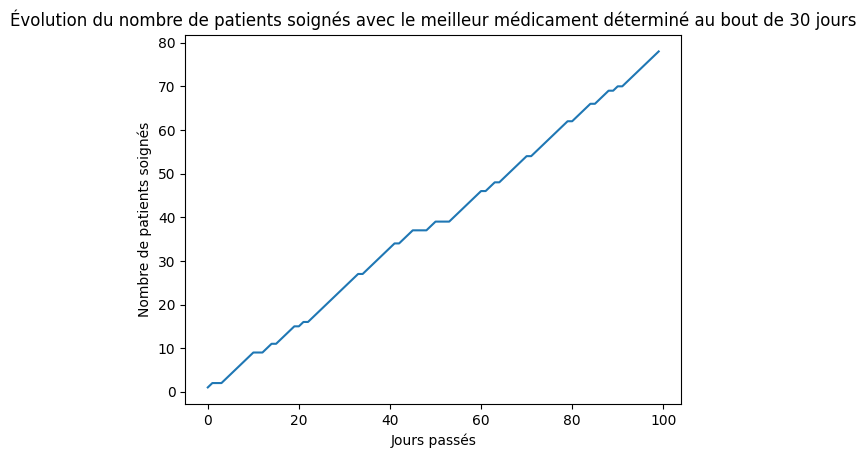

Beta test [1, 2, 3, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 32, 33, 33, 34, 34, 35, 36, 36, 37, 38, 39, 40, 40, 40, 40, 41, 41, 42, 43, 44, 45, 45, 45, 45, 46, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 57, 58, 59, 60, 61, 62, 63, 63, 64, 65, 66, 67, 68, 68, 69, 69, 70, 71]


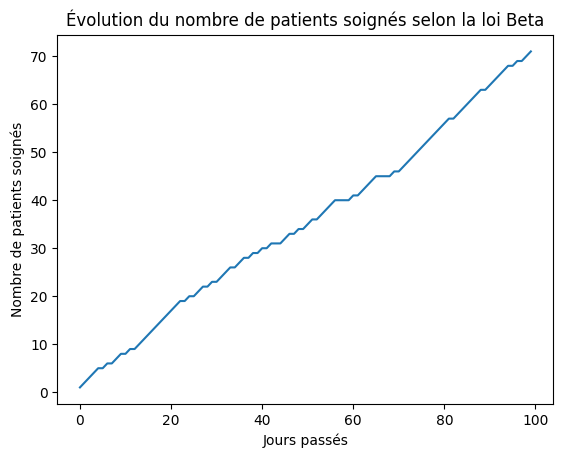

TypeError: '>' not supported between instances of 'medicament' and 'medicament'

In [533]:
# Test
listeMedoc = [0,1,2,3,4,5,6,7,8,9]
monSoignant = soignant()
monSoignant.findBestMedicIn30jours(listeMedoc)
monSoignant.findBestMedicWithBeta(listeMedoc)
monSoignant.findBestMedicWithPercentage(listeMedoc)